## Importing Dependencies :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

## Data Loading :

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Understanding Data :

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#as seen in the dataset , 'Total Charges' is float type but in info its showing as object , so we need to convert it to float without any missing values as well
#also , we don't really need the 'customerID' column as we won't be needing it while modeling

In [7]:
df= df.drop(columns='customerID')

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [10]:
unique_info = {col: (df[col].nunique(), df[col].unique()) for col in df.columns}
unique_info

{'gender': (2, array(['Female', 'Male'], dtype=object)),
 'SeniorCitizen': (2, array([0, 1])),
 'Partner': (2, array(['Yes', 'No'], dtype=object)),
 'Dependents': (2, array(['No', 'Yes'], dtype=object)),
 'tenure': (73,
  array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
         21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
          9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
         36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
         54, 51, 26,  0, 39])),
 'PhoneService': (2, array(['No', 'Yes'], dtype=object)),
 'MultipleLines': (3, array(['No phone service', 'No', 'Yes'], dtype=object)),
 'InternetService': (3, array(['DSL', 'Fiber optic', 'No'], dtype=object)),
 'OnlineSecurity': (3,
  array(['No', 'Yes', 'No internet service'], dtype=object)),
 'OnlineBackup': (3,
  array(['Yes', 'No', 'No internet service'], dtype=object)),
 'DeviceProtection': (3,
  array(['No', 'Yes', 'No internet

In [11]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [12]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
len(df[df['TotalCharges'] == ' '])

11

In [15]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)

In [16]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**Insights:**

1.Removed CustomerID

2.No missing values

3.changed type of TotalCharges

4.Churn(Target) class is imbalanced


## EDA :

In [20]:
df.shape

(7043, 20)

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Distributions and Features:**

In [24]:
def plot_hist(df,column_name):
  plt.figure(figsize=(12,4))
  sns.histplot(df[column_name],kde=True)
  plt.title(f'Distribution of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Count')
  col_mean=df[column_name].mean()
  col_median=df[column_name].median()
  col_std=df[column_name].std()
  plt.axvline(col_mean,color='red',linestyle='-',linewidth=2,label='Mean')
  plt.axvline(col_median,color='green',linestyle='dashed',linewidth=2,label='Median')
  plt.legend()
  plt.show()

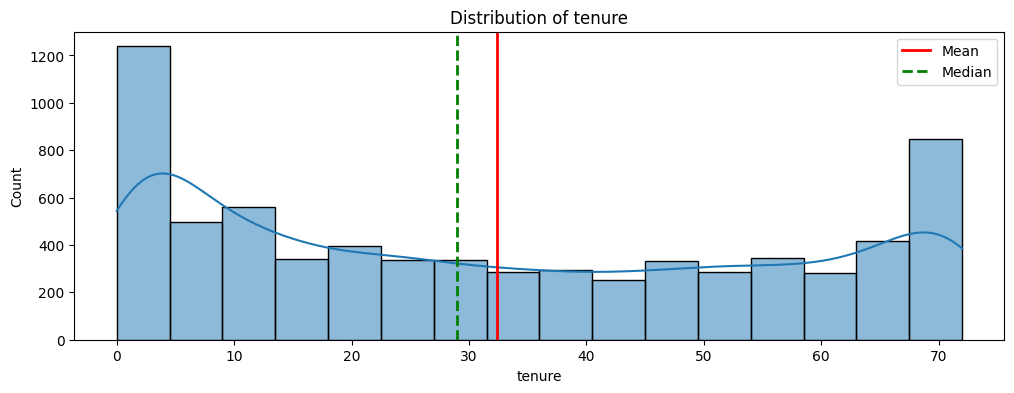

In [25]:
plot_hist(df,'tenure')

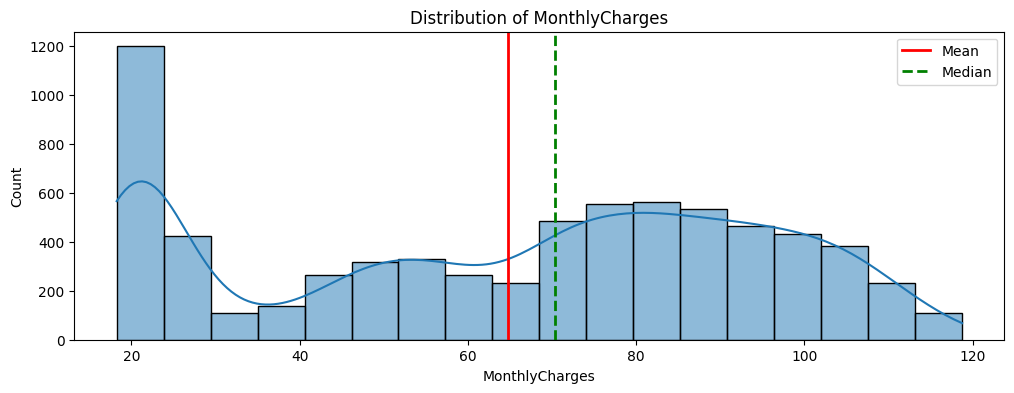

In [26]:
plot_hist(df,'MonthlyCharges')

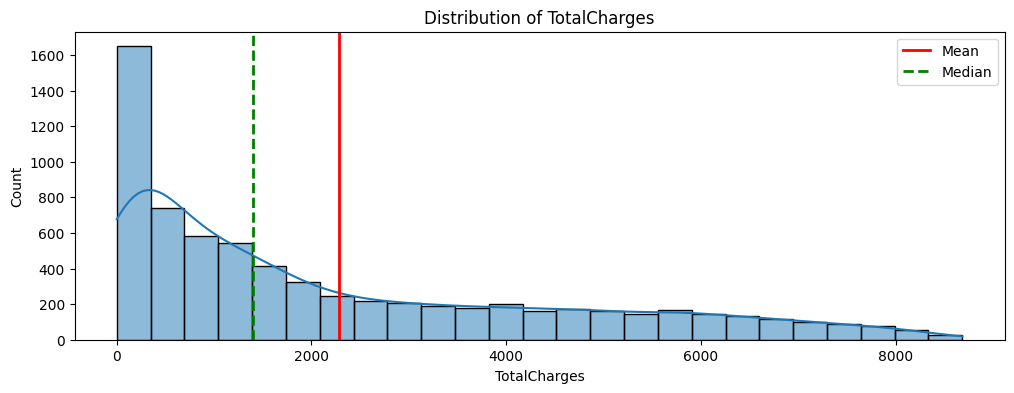

In [27]:
plot_hist(df,'TotalCharges')

In [28]:
def plot_box(df,column_name):
  plt.figure(figsize=(12,4))
  sns.boxplot(y=df[column_name])
  plt.title(f'Distribution of {column_name}')
  plt.ylabel(column_name)
  plt.show()

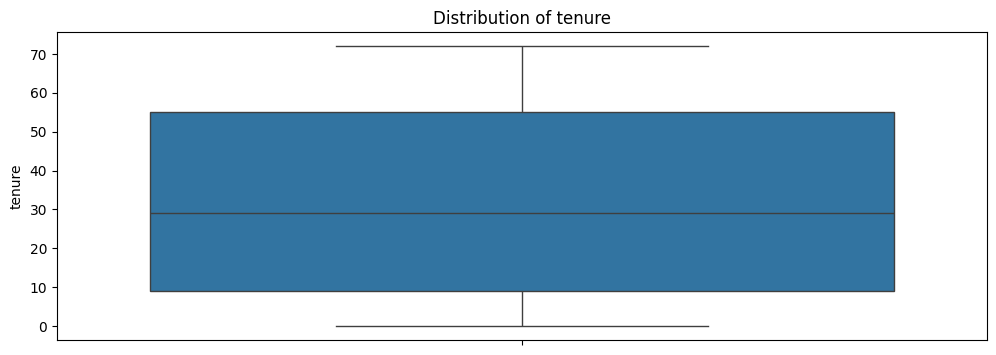

In [29]:
plot_box(df, 'tenure')

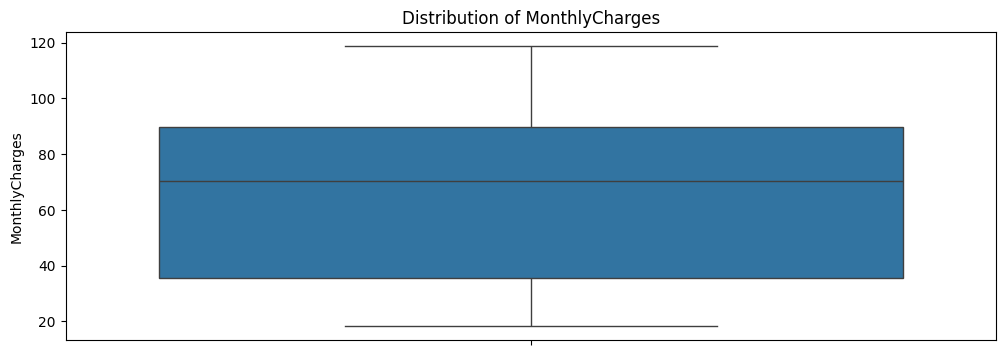

In [30]:
plot_box(df, 'MonthlyCharges')

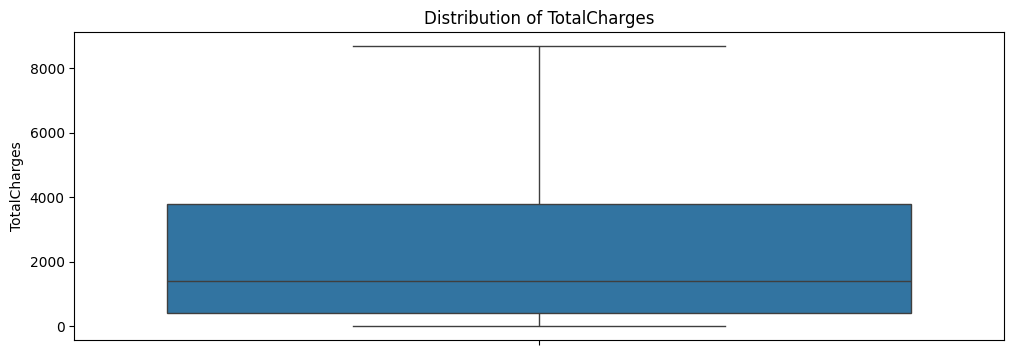

In [31]:
plot_box(df, 'TotalCharges')

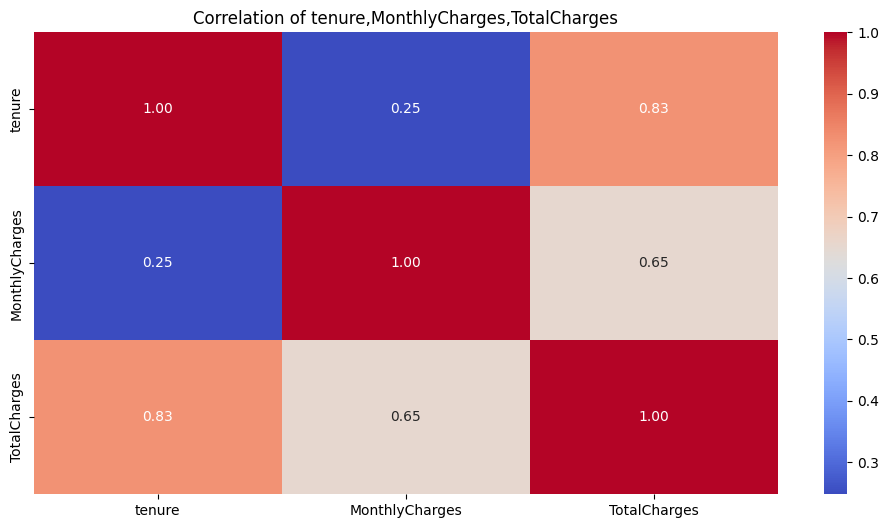

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title(f'Correlation of tenure,MonthlyCharges,TotalCharges')
plt.show()

**Categorical  Features:**

In [33]:
obj_cols = df.select_dtypes(include='object').columns.to_list()
obj_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [34]:
obj_cols += ['SeniorCitizen']

In [35]:
obj_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

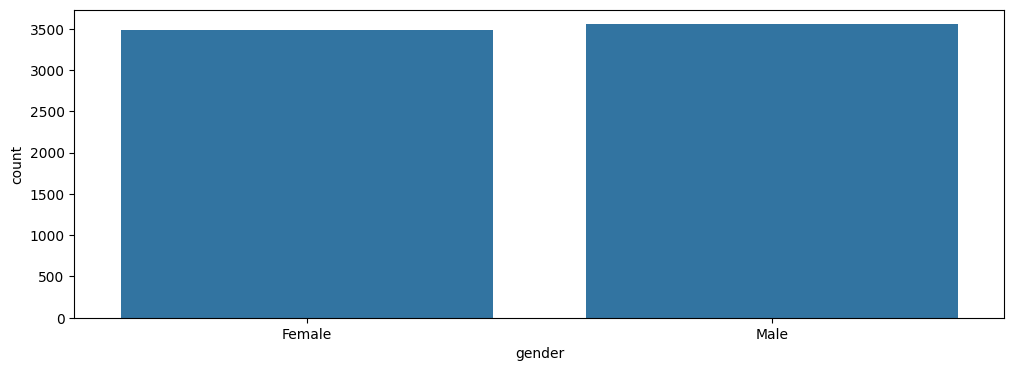

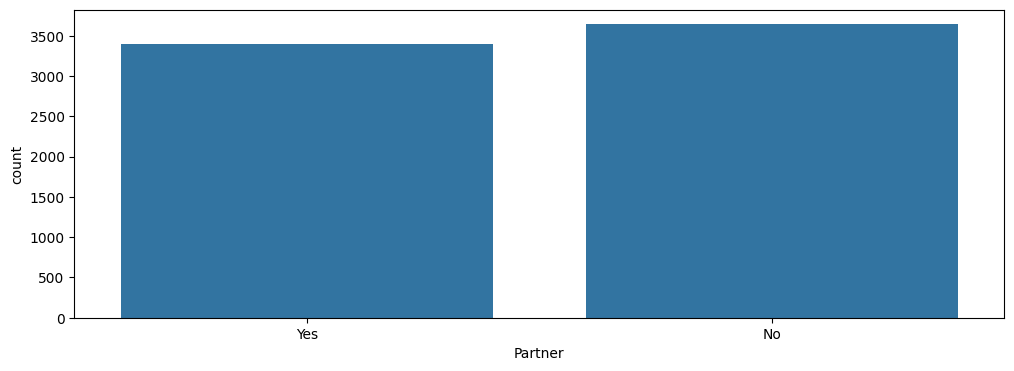

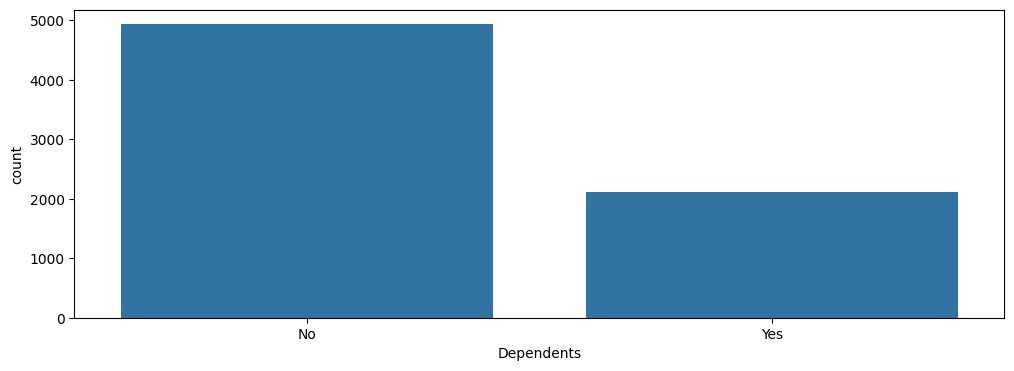

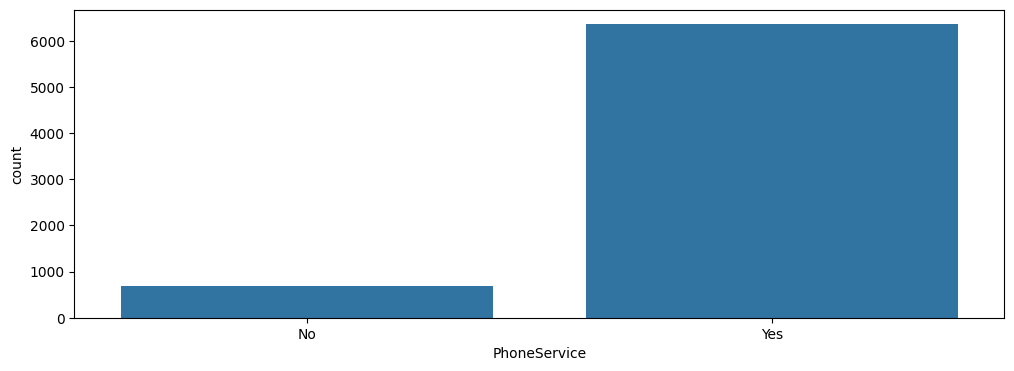

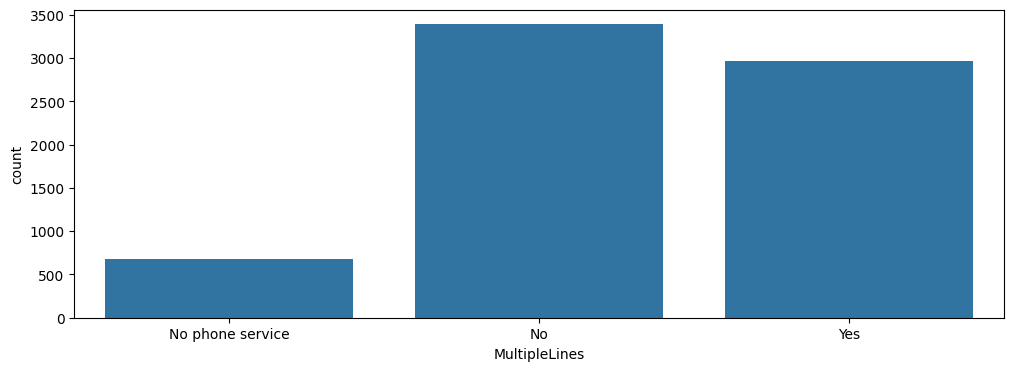

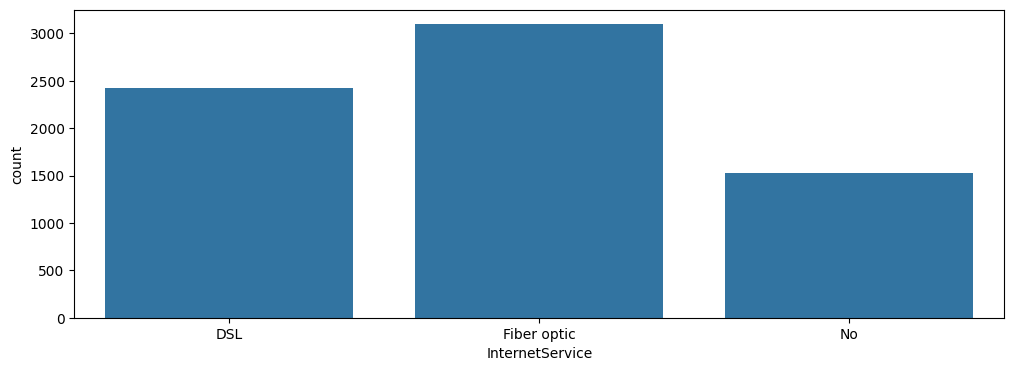

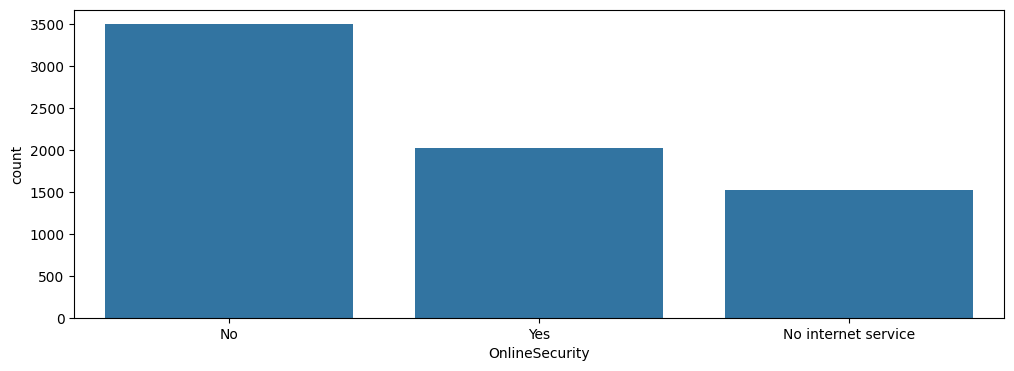

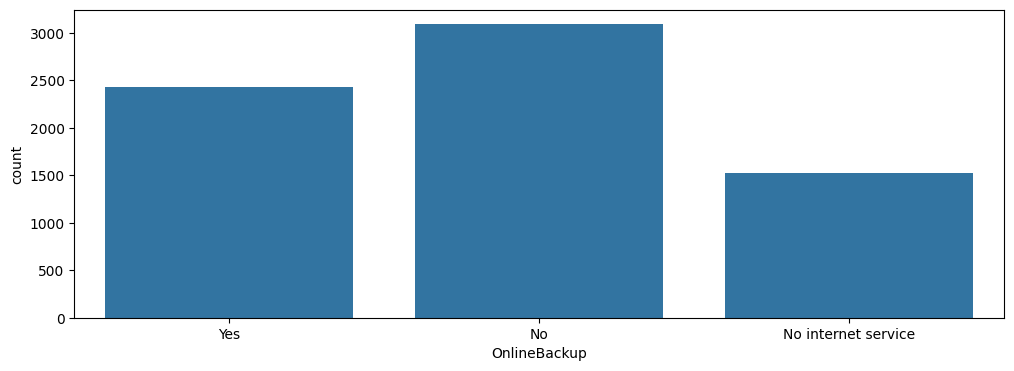

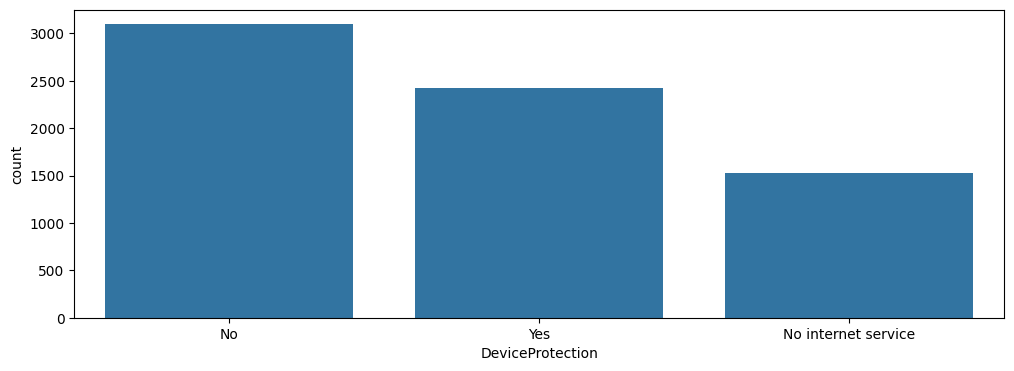

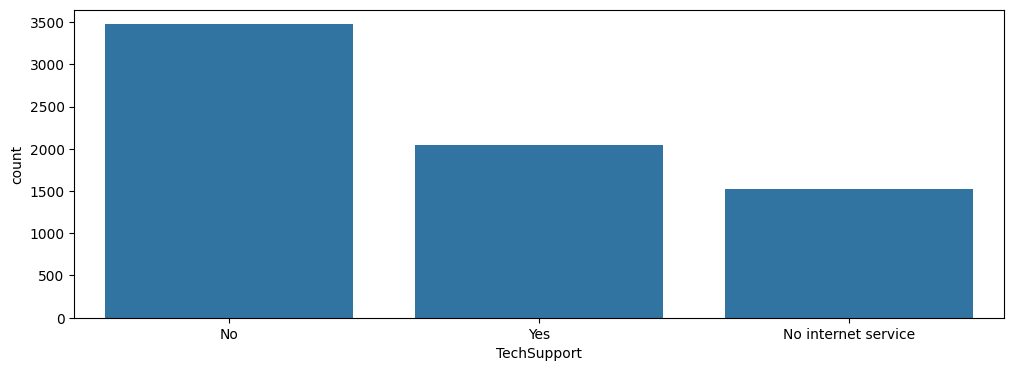

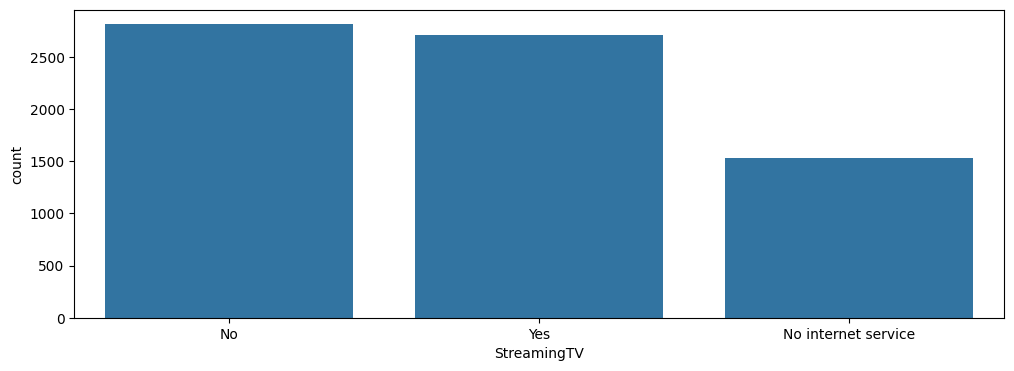

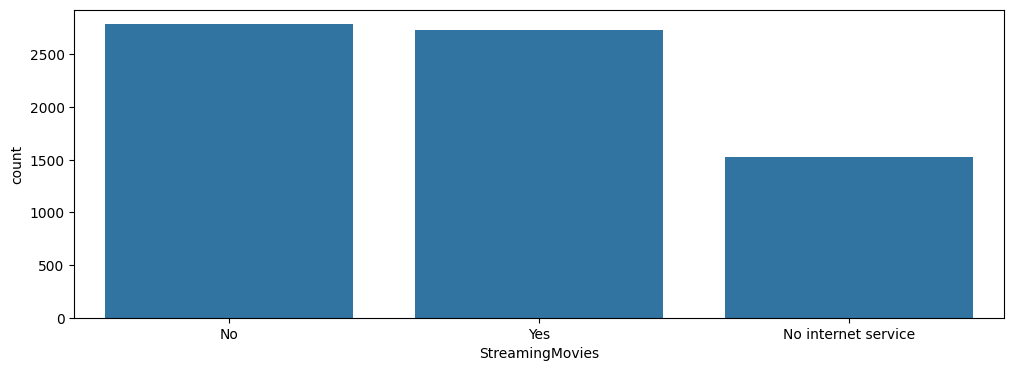

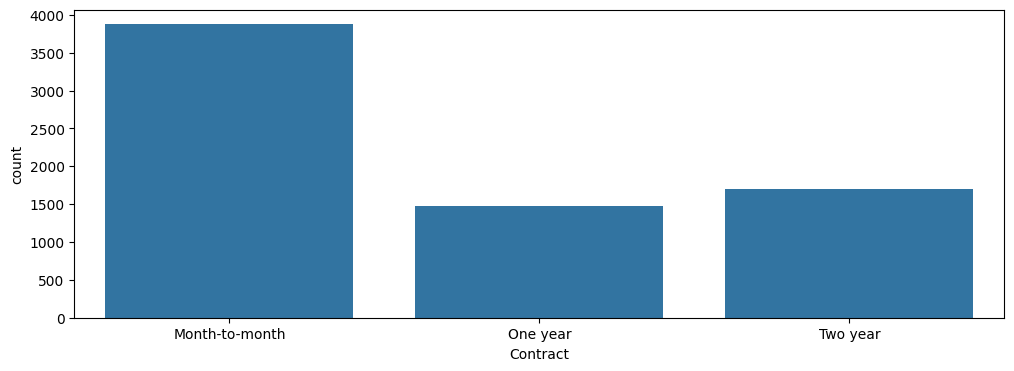

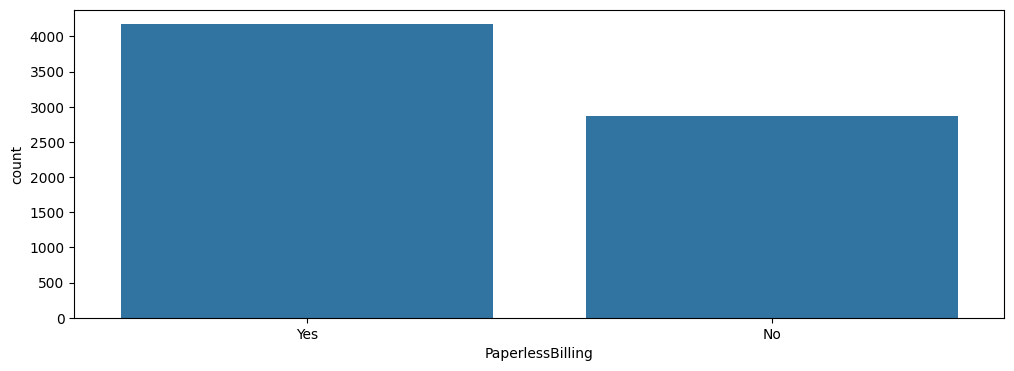

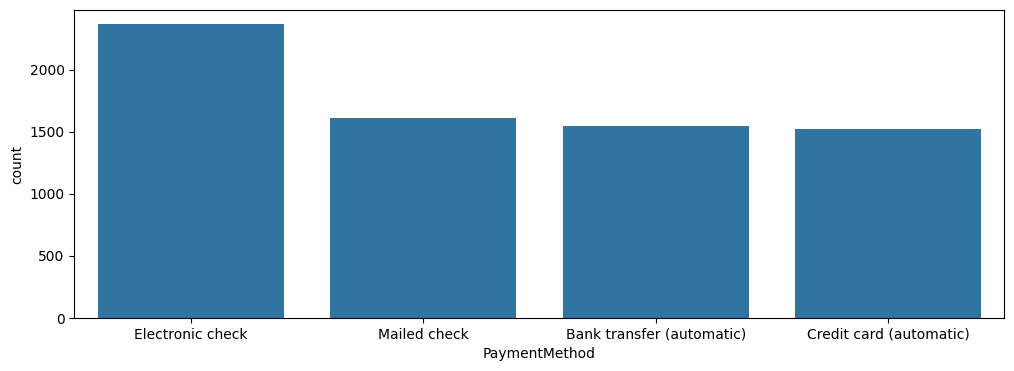

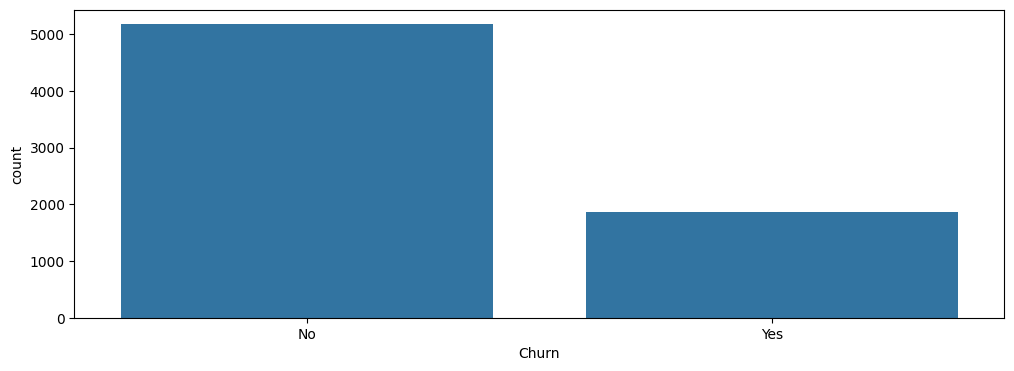

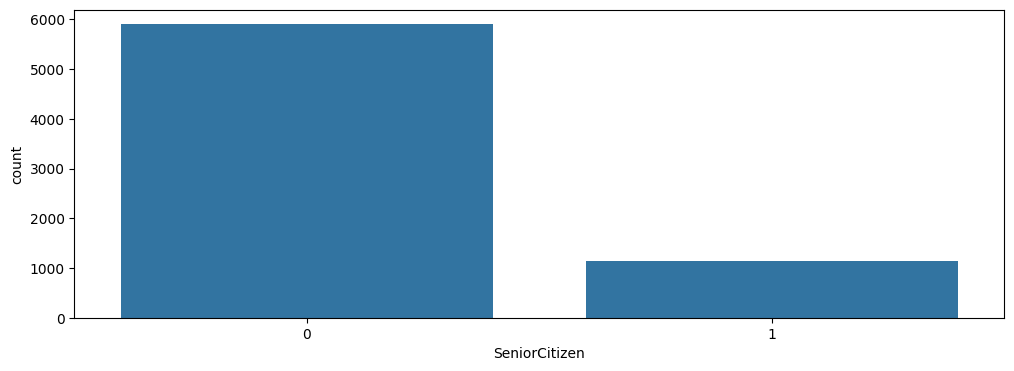

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [36]:
[plt.figure(figsize=(12,4)) and sns.countplot(x=df[col]) and plt.show() for col in obj_cols]

## Data Preprocessing :

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Label Encoding of Targert Column(Churn)**

In [38]:
df['Churn'] = df['Churn'].replace({'Yes':0,"No":1}).infer_objects(copy=False)

<ipython-input-38-a582838c4cbd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes':0,"No":1}).infer_objects(copy=False)


In [39]:
df['Churn'].value_counts()

,count
Churn,
1,5174
0,1869


In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


**Label Encoding of Other Categorical Columns**

In [41]:
obj_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [42]:
obj_cols.remove('Churn')

In [43]:
enc1 = {}

In [44]:
for col in obj_cols:
  lbl_enc = LabelEncoder()
  df[col] = lbl_enc.fit_transform(df[col])
  enc1[col] = lbl_enc

In [45]:
enc1

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'SeniorCitizen': LabelEncoder()}

In [80]:
with open("encoders.pkl","wb") as f:
  pickle.dump(enc1,f)

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0


In [47]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']

In [48]:
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

## Data Splitting :

In [49]:
X = df.drop(columns='Churn')
y = df['Churn']

In [50]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462


In [51]:
y.head()

,Churn
0,1
1,1
2,0
3,1
4,0


In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,1
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,1
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,0
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,1
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [55]:
X_train.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure    PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
1       0              0        0           0.013889  1             0              1                0               0             0                 0            0            0                0         1                 2              0.513930        0.008049        3
0       0              0        0           0.013889  1             0              2                1               1             1                 1            1            1                0         0                 3              0.026368        0.002407        3
1       0              0        0           0.013889  1             0              2                1               1             1                 1            1            1                0         0                 3              0.019403        0.002326        3
                                                                                                                                                                                                         1                 3              0.019403        0.002326        2
0       0              0        0           0.013889  1             0              1                0               0             0                 0            0            0                0         1                 2              0.506965        0.007968        2
                                                                                                                                                                                                                                                                         ..
                       1        1           0.416667  1             2              1                0               0             2                 0            2            2                0         1                 2              0.813930        0.350745        1
                                                                    0              2                1               1             1                 1            1            1                2         0                 3              0.010448        0.069420        1
                                                                                                                                                                                               1         0                 0              0.012935        0.070065        1
                                                                                   1                0               0             2                 0            0            2                1         0                 2              0.678607        0.292240        1
                                            0.444444  0             1              0                2               2             0                 0            0            0                0         1                 2              0.168159        0.121022        1
Name: count, Length: 5610, dtype: int64

In [56]:
X_test.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure    PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
1       0              0        0           0.013889  1             0              2                1               1             1                 1            1            1                0         0                 3              0.017413        0.002303        2
                                            0.722222  1             0              1                0               2             0                 0            0            2                0         1                 2              0.667662        0.499562        1
                                                                                                                    0             2                 0            0            2                0         1                 1              0.652239        0.498733        1
                                                                                   0                2               2             0                 0            2            0                2         1                 1              0.447761        0.384862        1
                                                                                                                    0             2                 0            0            0                1         0                 2              0.353234        0.321326        1
                                                                                                                                                                                                                                                                         ..
0       0              1        1           0.152778  1             0              2                1               1             1                 1            1            1                2         0                 1              0.026368        0.023294        1
                                                                                                                                                                                               1         1                 3              0.017413        0.022608        1
                                            0.138889  1             2              1                0               2             2                 0            2            2                0         1                 1              0.834328        0.123071        1
                                            0.125000  1             2              1                0               0             0                 0            2            0                0         1                 0              0.667662        0.086893        1
                                            0.180556  1             0              2                1               1             1                 1            1            1                0         0                 3              0.005473        0.028930        1
Name: count, Length: 1408, dtype: int64

In [57]:
y_train.value_counts()

,count
Churn,
1,4138
0,1496


In [58]:
y_test.value_counts()

,count
Churn,
1,1036
0,373


### Oversampling Imbalanced Data :

In [59]:
smote = SMOTE(random_state=42)

In [60]:
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

In [61]:
X_train_smote.shape

(8276, 19)

In [62]:
y_train_smote.shape

(8276,)

In [63]:
y_train_smote.value_counts()

,count
Churn,
1,4138
0,4138


## Model Training :

In [64]:
models = {"Decision Tree" : DecisionTreeClassifier(random_state=42),
          "Random Forest" : RandomForestClassifier(random_state=42),
          "XGBoost" : XGBRFClassifier(random_state=42)}

In [65]:
cv_Scores = {}

for model_name, model in models.items():
  scores= cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_Scores[model_name] = scores
  print(f"{model_name} cross-val accuracy: {np.mean(scores):.2f}")

Decision Tree cross-val accuracy: 0.76
Random Forest cross-val accuracy: 0.84
XGBoost cross-val accuracy: 0.79


In [66]:
cv_Scores

{'Decision Tree': array([0.7192029 , 0.72567976, 0.79637462, 0.78187311, 0.78549849]),
 'Random Forest': array([0.7910628 , 0.80362538, 0.8592145 , 0.85558912, 0.86646526]),
 'XGBoost': array([0.75724638, 0.7673716 , 0.79818731, 0.80120846, 0.81570997])}

**Random Forest performs the best among all the models**

In [67]:
rfc = RandomForestClassifier(random_state=42)

In [72]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

## Model Evaluation :

In [73]:
y_test.value_counts()

,count
Churn,
1,1036
0,373


In [76]:
y_test_pred = rfc.predict(X_test)

In [78]:
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))


Accuracy Score:
 0.7721788502484032
Confusion Matrix:
 [[253 120]
 [201 835]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.61       373
           1       0.87      0.81      0.84      1036

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



## Saving Model & Predict :

In [84]:
model_data = {"model":rfc,"feature_names":X.columns.to_list()}

In [85]:
with open("Customer_Churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

In [87]:
#Predicting:
with open("Customer_Churn_model.pkl","rb") as f:
  model_data = pickle.load(f)
  loaded = model_data['model']
  features = model_data['feature_names']


In [88]:
print(loaded)

RandomForestClassifier(random_state=42)


In [89]:
print(features)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
